# QPCA analysis of the MNIST Dataset 
In this notebook, we use both classical and quantum PCA to analyze the 
MNIST dataset (see [this paper](https://journals.aps.org/prxquantum/pdf/10.1103/PRXQuantum.3.030334)).

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.linalg import expm
from collections import defaultdict
from IPython.display import display
from keras.datasets import mnist

from qiskit_aer import *
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, PhaseEstimation
from qiskit.circuit.library.data_preparation import StatePreparation

import qPCA_funcs as QF

In [2]:
#checking that the dataset loading works
(X, y), _ = mnist.load_data()

# take subset of 5000 images
idx = np.random.choice(np.arange(y.shape[0]), size=5000, replace=False)
X=X[idx,:,:]
y=y[idx]

#printing the shapes of the vectors 
print('X: ' + str(X.shape))
print('Y: ' + str(y.shape))

# check that the labels are balanced
nums, counts = np.unique(y, return_counts=True)
for n, c in zip(nums, counts):
    print(f"{n}: {c} counts")

# we need to flatten the images into a 1D vector each
# so X is a 2D array
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
print(X.shape)
# compute covariance matrix
cov_matr = np.cov(X, rowvar=False)
print(f'Covariance matrix shape: {cov_matr.shape}')

X: (5000, 28, 28)
Y: (5000,)
0: 502 counts
1: 553 counts
2: 544 counts
3: 516 counts
4: 482 counts
5: 469 counts
6: 478 counts
7: 481 counts
8: 488 counts
9: 487 counts
(5000, 784)
Covariance matrix shape: (784, 784)


## Quantum PCA


Input State preparation...
Input Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Normalization factor:
 3437126.17

Padded Normalized Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

# qubits:
 20

Initial state circuit:


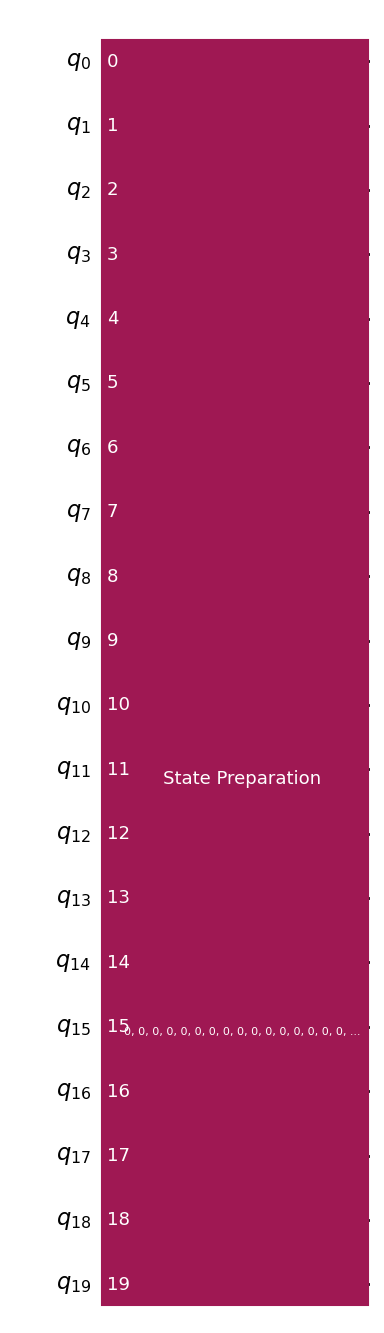


Unitary gate construction...

Building Phase Estimation circuit...


In [ ]:
eigvals, eigvecs = QF.run_qPCA(cov_matr, resolution=4, verbose=True)


Input State preparation...
Input Matrix:
 [[1.5 0.5]
 [0.5 1.5]]

Normalization factor:
 3.0

Padded Normalized Matrix:
 [[0.5  0.17]
 [0.17 0.5 ]]

# qubits:
 2

Initial state circuit:


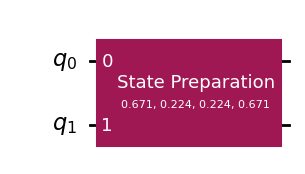


Unitary gate construction...

Building Phase Estimation circuit...
Resolution: 4
# qubits for PE: 6
Phase Estimation circuit:


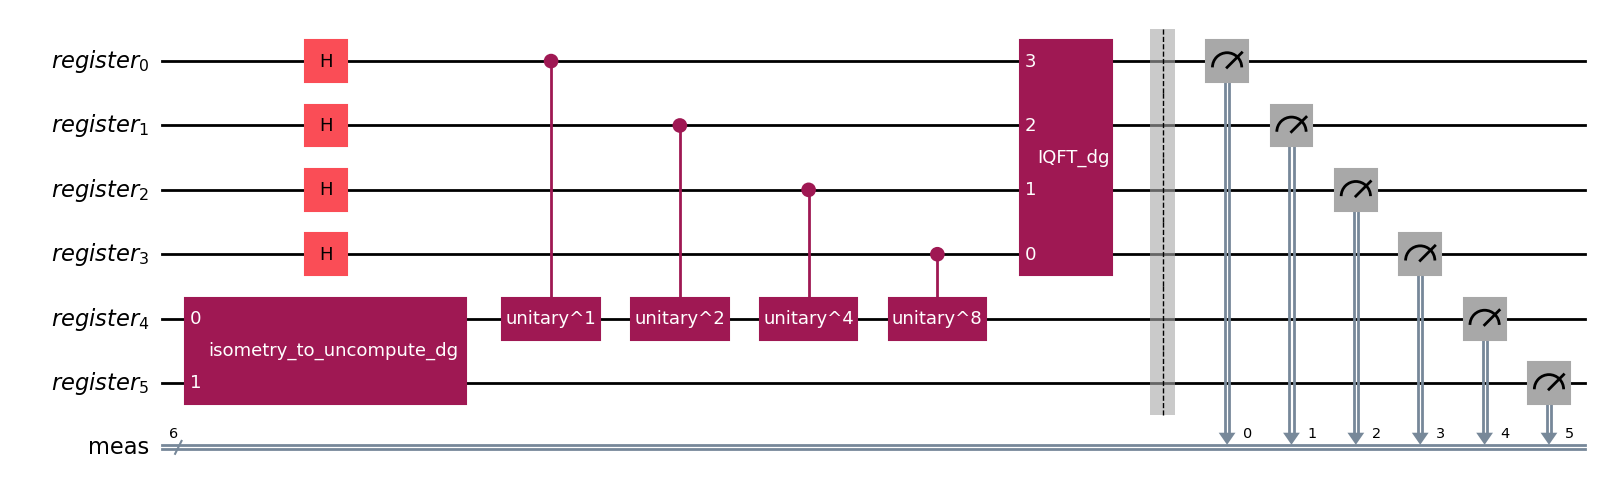


Running Phase Estimation...
PE result counts:


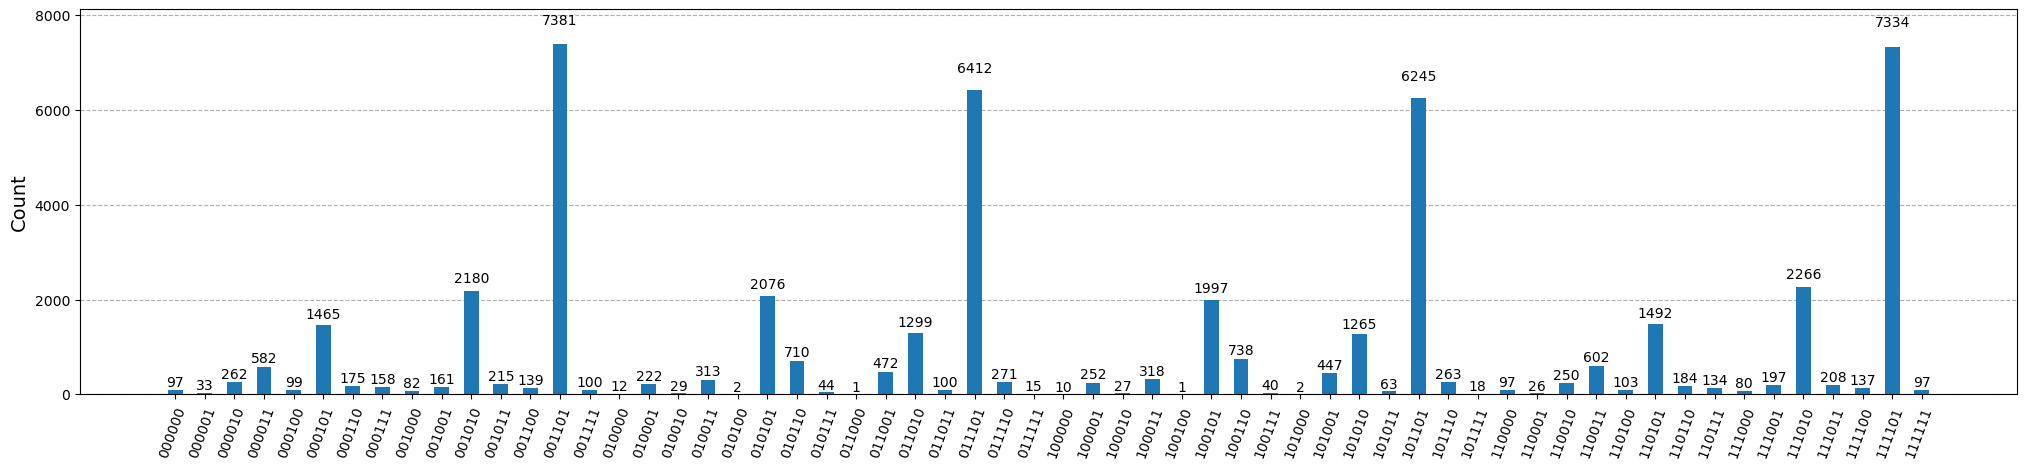


Probability estimation...

Sign estimation...
PE circuit data :
[CircuitInstruction(operation=Instruction(name='PE', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(6, 'register'), 0), Qubit(QuantumRegister(6, 'register'), 1), Qubit(QuantumRegister(6, 'register'), 2), Qubit(QuantumRegister(6, 'register'), 3), Qubit(QuantumRegister(6, 'register'), 4)), clbits=())]
Sign estimation circuit:


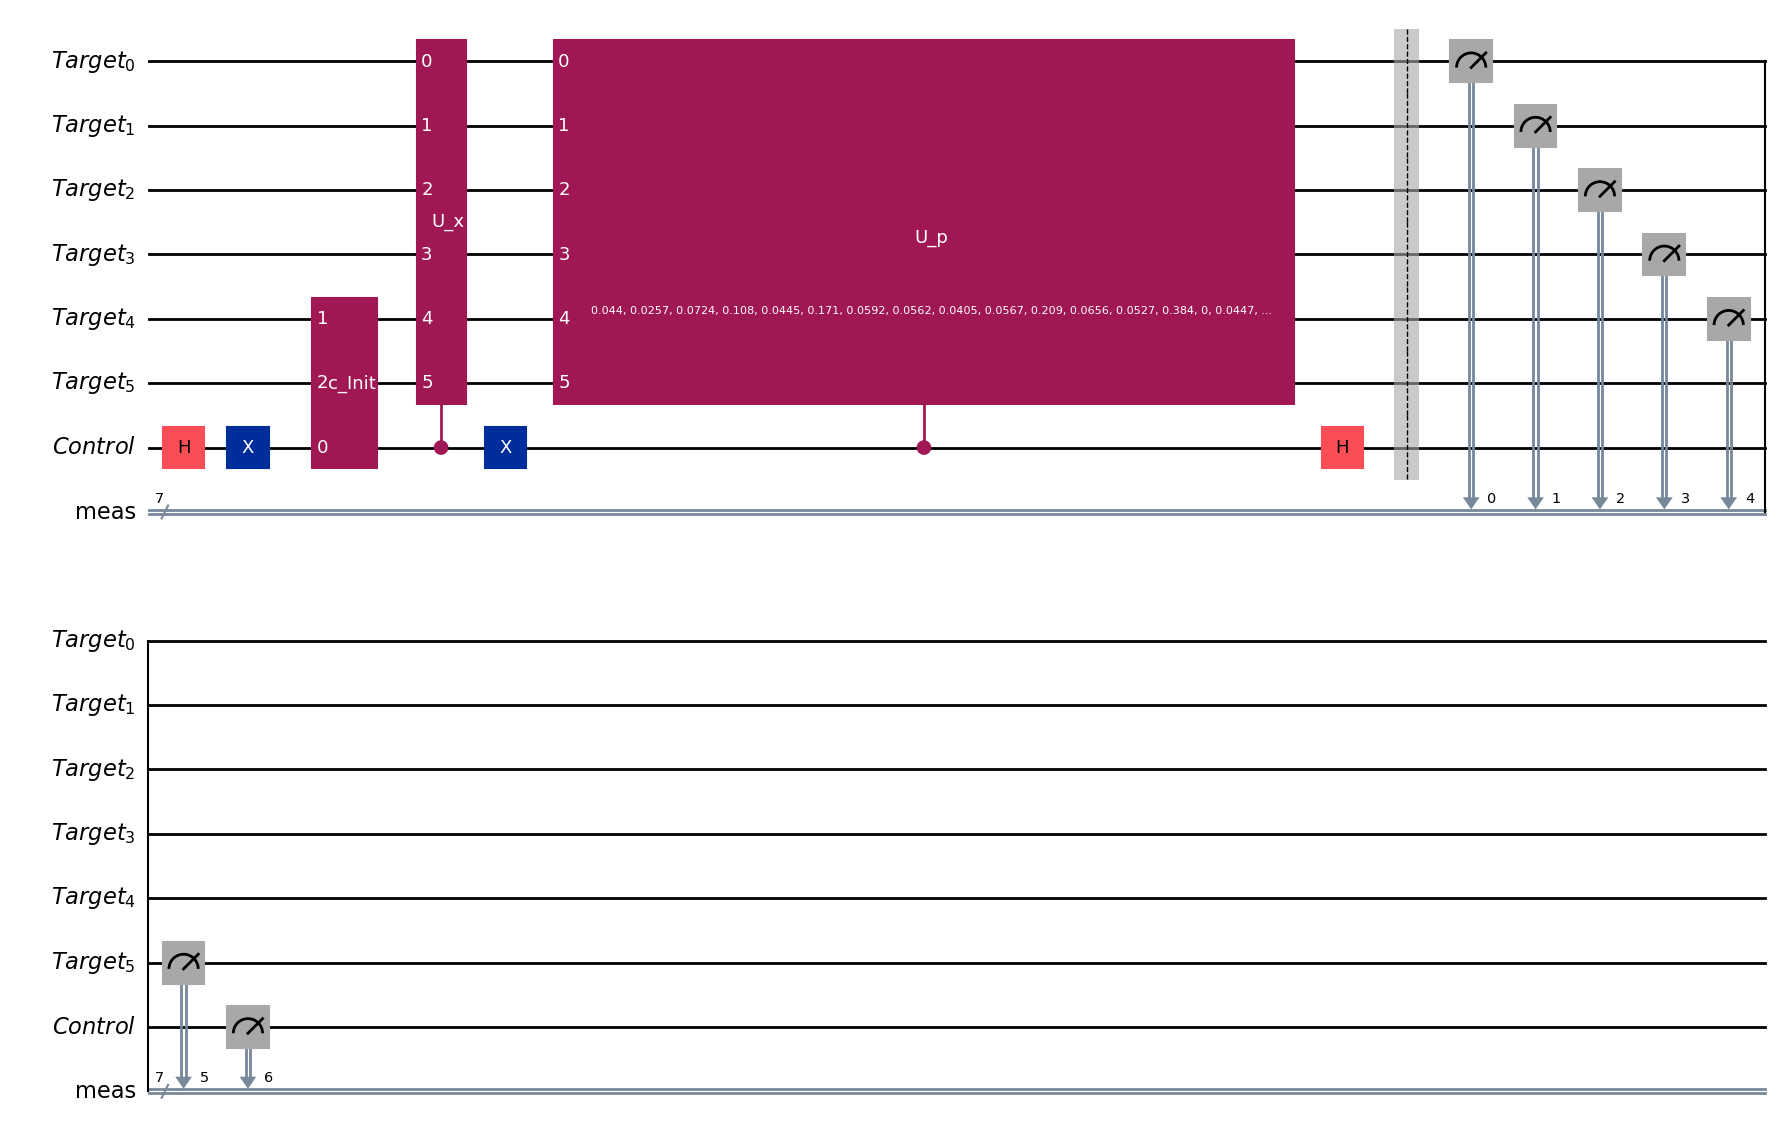

SE result counts:


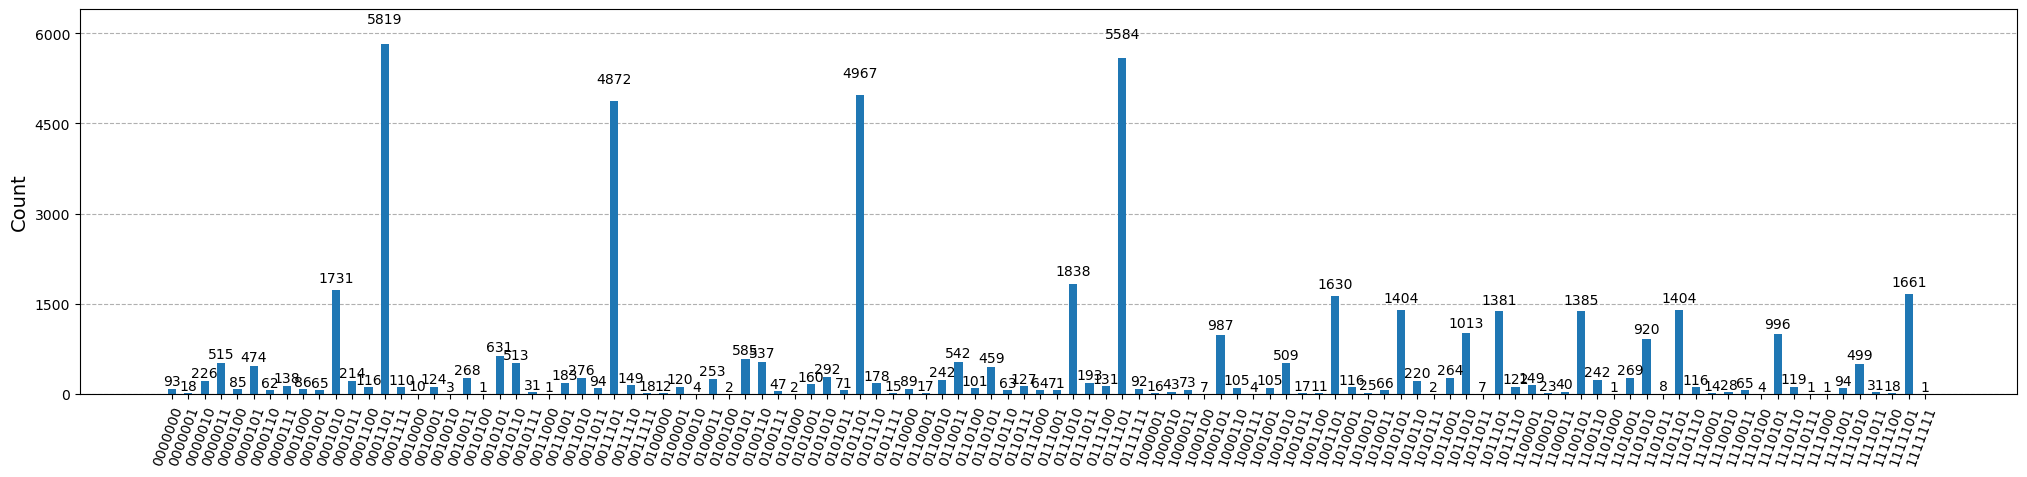


Eigenvalue and -vector construction...
found peaks:  [ 5 11] ['1010', '1101']

Eigenvalue: 0.3125
Eigenvector chunks: [[ 0.55765967 -0.43047265]
 [-0.42480171  0.56855298]]
Max amplitudes:  [0.55765967 0.56855298]
Dominant chunk:  [-0.42480171  0.56855298]

Eigenvalue: 0.6875
Eigenvector chunks: [[0.51928328 0.48399792]
 [0.47765349 0.51762732]]
Max amplitudes:  [0.51928328 0.51762732]
Dominant chunk:  [0.51928328 0.48399792]
Eigenvalue: 0.938, eigenvector: [-0.563  0.754]
Eigenvalue: 2.062, eigenvector: [0.721 0.672]
Done!


In [3]:
# input matrix for testing
matr = np.array([[1.5, 0.5],[0.5, 1.5]])
eigvals, eigvecs = QF.run_qPCA(matr, resolution=4, verbose=True)

## Classical PCA

In [ ]:
# find the eigenvectors of the covariance matrix.
l, V = np.linalg.eig(cov_matr)
print (l[:5])
print (V[:5])
ratios = l/np.trace(cov_matr)

# ugly loop, replace later
# print eigvals of PCS explaining 75% of the variance
threshold = 0.75
sum = 0
i=0
while sum<threshold:
    print(np.real(ratios[i]))
    sum += ratios[i]
    i += 1

In [ ]:
# lazy version
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

print(pca.components_[:5])
print(pca.explained_variance_ratio_[:5])